## Objectif

Entraîner notre premier réseau neuronal pour prédire la résiliation de clients
Dans ce notebook, notre objectif principal est d’acquérir une expérience pratique des réseaux neuronaux et de leur application à la résolution de problèmes réels. Nous travaillerons avec un ensemble de données de résiliation de clients, visant à comprendre les fondamentaux de la création et de l’entraînement d’un réseau neuronal pour la modélisation prédictive.

### Objectifs clés :
- Prétraiter et explorer l’ensemble de données de résiliation de clients.
- Apprendre les bases de l’architecture des réseaux neuronaux.
- Entraîner un modèle de réseau neuronal pour prédire la résiliation de clients.
- Évaluer l’exactitude et les performances du modèle.
- Prédire si le client suivant va abandonner ou non la banque 

In [ ]:
# Execute this just once or restart the kernel to avoid errors
import os 

os.chdir("../data")
%pwd

In [3]:
#Import the libraries
import numpy as np
import pandas as pd 

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

import seaborn as sns
import matplotlib.pyplot as plt

print("Setup Completed")

Setup Completed


1. Préparer le dataset 

- Data Importation
- Data Cleaning
- Data Visualization
- Feature Engineering
- Data Preparation and Preprocessing 

In [84]:
# Data Imporataion
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [85]:
# Data Cleaning

dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [86]:
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

# Data Visualization For Categorical Data


dataset.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

0    7963
1    2037
Name: Exited, dtype: int64


c:\Users\P52s\.conda\envs\chat\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


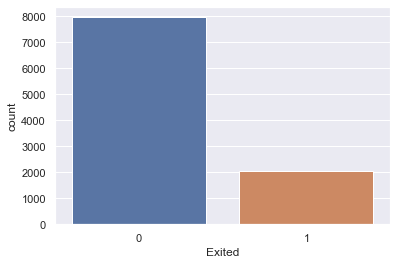

In [87]:
print(dataset.Exited.value_counts())
sns.countplot(dataset["Exited"]);

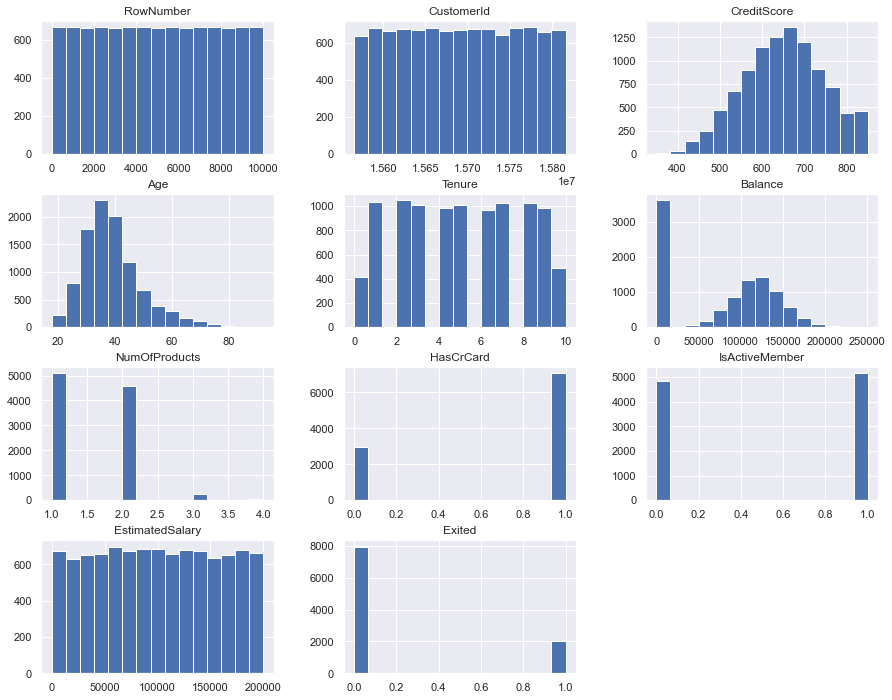

In [88]:
dataset.hist(figsize=(15, 12), bins=15);

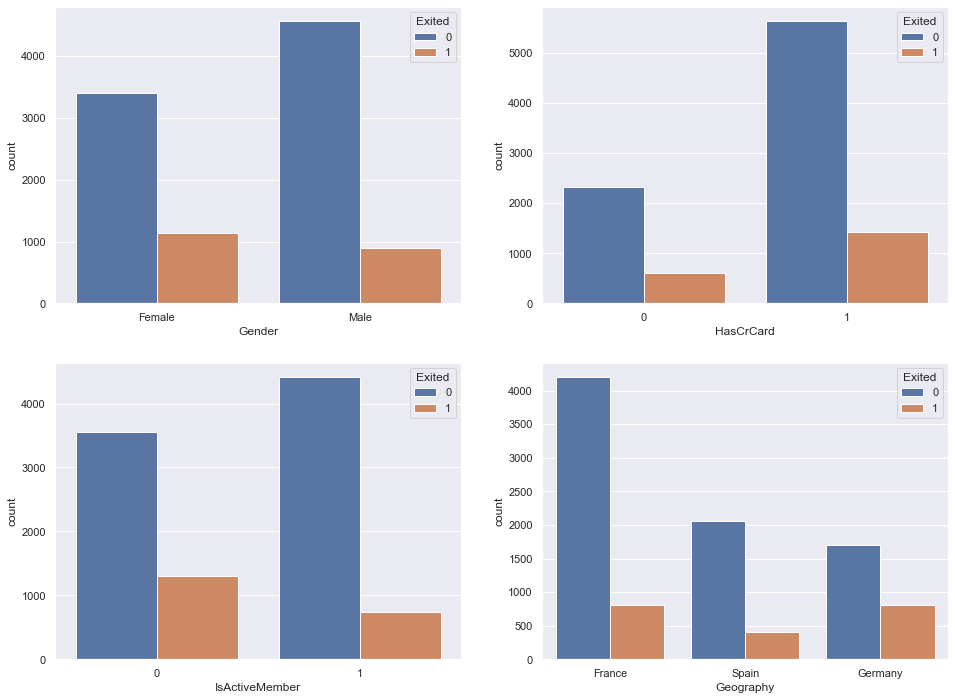

In [89]:
cat_list = ["Gender", "HasCrCard", "IsActiveMember", "Geography"]
index = 0
plt.figure(figsize=(16, 12))
for i in cat_list:
    index += 1
    plt.subplot(2, 2, index)
    sns.countplot(data=dataset, x=i, hue="Exited")

c:\Users\P52s\.conda\envs\chat\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


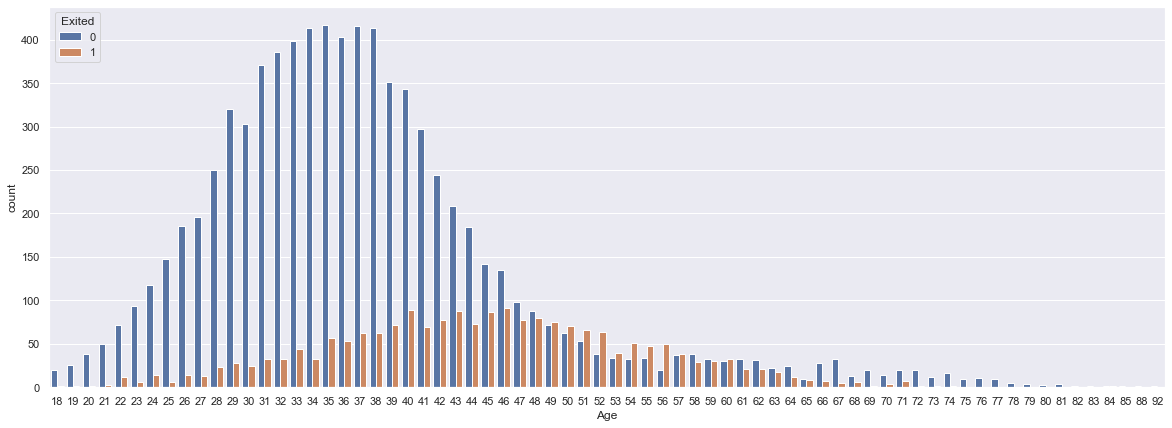

In [90]:
plt.figure(figsize=(20, 7))
sns.countplot(dataset.Age, hue=dataset.Exited);

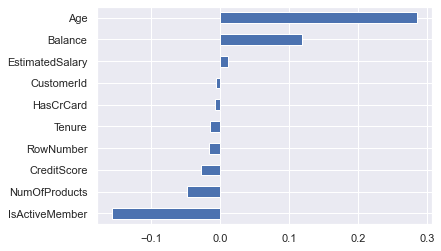

In [91]:
dataset.corr()['Exited'][:-1].sort_values().plot.barh();

In [92]:
# Feature Engineering

### Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

## Concatenate the Data Frames
X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)


X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [93]:
# Data Preparation and Preprocessing

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

2. Créer le réseau de neurone adéquat

In [67]:
# Initialising the ANN
classifier = Sequential()

In [68]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'he_normal',activation='relu',input_dim = 11))
classifier.add(Dropout(0.4))

In [69]:
#2nd layer
classifier.add(Dense(units = 15, kernel_initializer = 'he_normal',activation='relu'))
classifier.add(Dropout(0.4))

In [71]:
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

3. Compiler le réseau de neurones en suivant les pratiques qu’il faut 

- Optimiser Choisie : Adam


 **Réponse 3  :** The Adam optimizer is a first-order gradient-based optimization method that is capable of adjusting the learning rate based on data characteristics, making it well-suited to learn time-variant processes such as speech data with dynamically changing noise conditions ¹. 


- Loss Function : Binary Cross Entropy


 **Réponse 2 :**  la fonction de perte binary_crossentropy est appropriée pour les problèmes de classification binaire, comme celui de la prédiction de résiliation de clients. Elle mesure la divergence entre les distributions de probabilité réelles et prédites, favorisant une convergence efficace du modèle dans le contexte de la classification binaire.




In [72]:
#Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

4. Utilisant 100 Epoche allons Entrainer ce Modèle

In [73]:


model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)


Epoch 1/100
536/536 [==============================] - 4s 5ms/step - loss: 0.6070 - accuracy: 0.7324 - val_loss: 0.4882 - val_accuracy: 0.7955
Epoch 2/100
536/536 [==============================] - 3s 5ms/step - loss: 0.5208 - accuracy: 0.7863 - val_loss: 0.4676 - val_accuracy: 0.7955
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4892 - accuracy: 0.7960 - val_loss: 0.4524 - val_accuracy: 0.7967
Epoch 4/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4730 - accuracy: 0.7977 - val_loss: 0.4449 - val_accuracy: 0.7974
Epoch 5/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4633 - accuracy: 0.8015 - val_loss: 0.4348 - val_accuracy: 0.8065
Epoch 6/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4535 - accuracy: 0.8048 - val_loss: 0.4268 - val_accuracy: 0.8092
Epoch 7/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4521 - accuracy: 0.8095 - val_loss: 0.4259 - val_accuracy: 0.8103

5. Calculant la matrice de confusion

In [94]:
# Calcule de Matrix de Confusion
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,y_pred))

[[1568   27]
 [ 238  167]]


In [95]:
def calculate_classification_metrics(y_true, y_pred):
    true_positive = sum((true == 1 and pred == 1) for true, pred in zip(y_true, y_pred))
    true_negative = sum((true == 0 and pred == 0) for true, pred in zip(y_true, y_pred))
    false_positive = sum((true == 0 and pred == 1) for true, pred in zip(y_true, y_pred))
    false_negative = sum((true == 1 and pred == 0) for true, pred in zip(y_true, y_pred))

    precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) != 0 else 0
    recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) != 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

    accuracy = (true_positive + true_negative) / len(y_true)
    
    return {
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
        'accuracy': accuracy,
        'true_positive': true_positive,
        'true_negative': true_negative,
        'false_positive': false_positive,
        'false_negative': false_negative,
    }


metrics = calculate_classification_metrics(y_test, y_pred)

# Print the classification report
print("Precision:", metrics['precision'])
print("Recall:", metrics['recall'])
print("F1 Score:", metrics['f1_score'])
print("Accuracy:", metrics['accuracy'])
print("True Positive:", metrics['true_positive'])
print("True Negative:", metrics['true_negative'])
print("False Positive:", metrics['false_positive'])
print("False Negative:", metrics['false_negative'])


Precision: [0.86082474]
Recall: [0.41234568]
F1 Score: [0.55759599]
Accuracy: [0.8675]
True Positive: [167]
True Negative: [1568]
False Positive: [27]
False Negative: [238]


In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1595
           1       0.86      0.41      0.56       405

    accuracy                           0.87      2000
   macro avg       0.86      0.70      0.74      2000
weighted avg       0.87      0.87      0.85      2000



6. Mesurer l'accuracy du modèle

In [76]:
print(accuracy_score(y_test,y_pred))

0.8675


7. Prédiction d'un Nouveau client

In [1]:
credit_score = 600
age = 40
tenure = 3
balance = 60000
num_of_products = 2
has_credit_card = 1  # Oui
is_active_member = 1  # Oui
estimated_salary = 50000
is_in_france = 1  # France
is_male = 1  # Masculin

def predict_customer_churn(credit_score, age, tenure, balance, num_of_products, has_credit_card, is_active_member, estimated_salary, is_in_france, is_male, classifier, scaler):
    """
    Predicts customer churn using a trained classifier.

    Parameters:
    - credit_score: Customer's credit score.
    - age: Customer's age.
    - tenure: Number of years the customer has been with the bank.
    - balance: Customer's account balance.
    - num_of_products: Number of bank products the customer uses.
    - has_credit_card: Whether the customer has a credit card (1 for Yes, 0 for No).
    - is_active_member: Whether the customer is an active member (1 for Yes, 0 for No).
    - estimated_salary: Customer's estimated salary.
    - is_in_france: Whether the customer is in France (1 for Yes, 0 for No).
    - is_male: Whether the customer is male (1 for Yes, 0 for No).
    - classifier: Trained classifier for predicting customer churn.
    - scaler: StandardScaler used for feature scaling.

    Returns:
    - Prediction result (True for Churn, False for No Churn).
    """

    # Create a new observation
    new_data = np.array([[credit_score, age, tenure, balance, num_of_products, has_credit_card, is_active_member, estimated_salary, 0, not is_in_france, is_male]])

    # Scale the new observation
    new_data_scaled = scaler.transform(new_data)

    # Make the prediction
    y_pred = classifier.predict(new_data_scaled)
    y_pred = (y_pred > 0.5)

    return y_pred[0]


# Assuming 'classifier' and 'scaler' are already defined
prediction_result = predict_customer_churn(600, 40, 3, 60000, 2, 1, 1, 50000, 1, 1, classifier, sc)
print("Prediction:", prediction_result)


NameError: name 'classifier' is not defined